In [0]:
from fastai.vision import *
from fastai.widgets import *

## Prepare DataBunch 



In [0]:
#if using colab, move 'data' to drive and uncomment the following lines to load data from drive

from google.colab import drive
drive.mount('/content/drive') 
path = '/content/drive/My Drive/repos/spotted_feline_classifier/data' # I put data in colab/repos/feline_classifier/data

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
np.random.seed(22)
data = ImageDataBunch\
    .from_folder(path,train=".",valid_pct=0.2,ds_tfms=get_transforms(),
                 size=224, num_workers=0)\
    .normalize(imagenet_stats)

In [0]:
data.classes

['cheetah', 'jaguar', 'leopard', 'other']

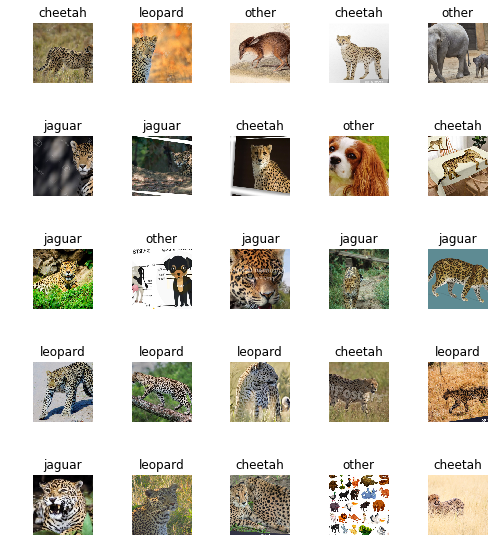

In [0]:
data.show_batch(rows=5, figsize=(7,8),)

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cheetah', 'jaguar', 'leopard', 'other'], 4, 628, 157)

# Train model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.351245,0.414214,0.121795,03:14
1,0.864804,0.272840,0.064103,00:58
2,0.616404,0.248365,0.076923,00:51
3,0.480930,0.248011,0.070513,00:52


In [0]:
learn.save('stage-1')

In [0]:
learn.load('stage-1')

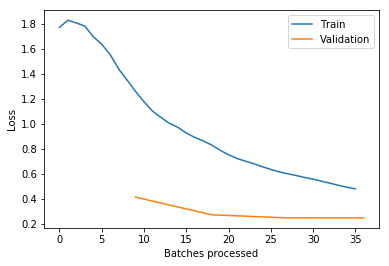

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

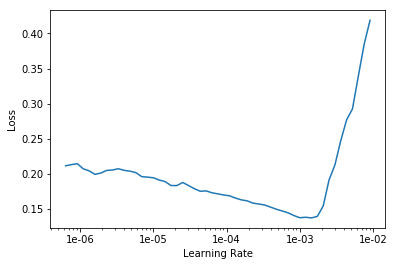

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, max_lr=slice(1e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.195630,0.239710,0.057692,00:52


In [0]:
learn.save('stage-2')

# Interpretation

In [0]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (628 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
leopard,leopard,leopard,leopard,leopard
Path: data;

Valid: LabelList (157 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
leopard,jaguar,cheetah,jaguar,jaguar
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

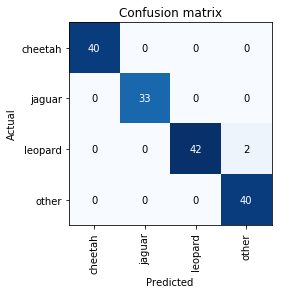

In [0]:
interp.plot_confusion_matrix()

In [0]:
import torch
from sklearn.metrics import accuracy_score

In [0]:
y_pred = torch.argmax(interp.preds,dim =1).numpy()
y_true = interp.y_true.numpy()

print('Accuracy:',np.round(accuracy_score(y_true,y_pred)*100,2),'%')

Accuracy: 98.73 %


In [0]:
learn.export()